In [33]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import itertools

In [40]:
def plotROC(pred_0, pred_1, target=None, truth=None, show=True):

    _cor = scipy.stats.pearsonr(pred_0[:, 0], pred_1[:, 0]).statistic
    _rho = scipy.stats.spearmanr(pred_0[:, 0], pred_1[:, 0]).statistic
    _tau = scipy.stats.kendalltau(pred_0[:, 0], pred_1[:, 0]).statistic

    if show:

        plt.figure(figsize=(10, 5))

        plt.subplot(1,2,1)
        _color = truth if truth is not None else target
        
        plt.scatter(pred_0, pred_1, c=_color, alpha=0.5)
    
        plt.title(f"r:{_cor:.2f}, ρ:{_rho:.2f}, τ:{_tau:.2f}")
        
        plt.subplot(1,2,2)

    if truth is not None:
            
        fpr, tpr, thresholds = roc_curve(truth, pred_0)
        roc_auc_0 = auc(fpr, tpr)
        if show:
            plt.plot(fpr, tpr, color='blue', lw=2, label=f'P0-y (AUC = {roc_auc_0:.2f})')
        
        fpr, tpr, thresholds = roc_curve(truth, pred_1)
        roc_auc_1 = auc(fpr, tpr)
        if show:
            plt.plot(fpr, tpr, color='red', lw=2, label=f'P1-y (AUC = {roc_auc_1:.2f})')

        _roc_auc_truth = roc_auc_0 / 2 + roc_auc_1 / 2

    else:

        _roc_auc_truth = None
        
    if target is not None:
            
        fpr, tpr, thresholds = roc_curve(target, pred_0)
        roc_auc_0 = auc(fpr, tpr)
        if show:
            plt.plot(fpr, tpr, '--', color='blue', lw=2, label=f'P0-s (AUC = {roc_auc_0:.2f})')
        
        fpr, tpr, thresholds = roc_curve(target, pred_1)
        roc_auc_1 = auc(fpr, tpr)
        if show:
            plt.plot(fpr, tpr, '--', color='red', lw=2, label=f'P1-s (AUC = {roc_auc_1:.2f})')

        _roc_auc_target = roc_auc_0 / 2 + roc_auc_1 / 2

    else:

        _roc_auc_target = None

    if show:
        
        plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # 对角线
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate (FPR)')
        plt.ylabel('True Positive Rate (TPR)')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc='lower right')
        plt.grid(True)
        plt.show()

    scores = {'cor':_cor, 'rho': _rho, 'tau': _tau, 'truth_auc': _roc_auc_truth, 'target_auc': _roc_auc_target}
    
    return scores

## MIMIC

In [22]:
dataset = 'MIMIC'
method = 'nnPU'
n_fold = 11
n_dim = 9

cor_list, rho_list, tau_list, auc_list = np.zeros([n_fold, n_dim]), np.zeros([n_fold, n_dim]), np.zeros([n_fold, n_dim]), np.zeros([n_fold, n_dim])

for fold, dim in itertools.product(range(n_fold), range(n_dim)):

    pred_0 = pd.read_csv(f"output/{dataset}/{method}_valid_fold_{fold}_split_0_dim_{dim}.csv").values
    pred_1 = pd.read_csv(f"output/{dataset}/{method}_valid_fold_{fold}_split_1_dim_{dim}.csv").values
    target = pd.read_csv(f"data/{dataset}/valid_labels_fold_{fold}_split_0.csv").values[:, dim]
    # truth = pd.read_csv(f"data/{dataset}/valid_truths_fold_{fold}_split_0.csv").values[:, dim]
    
    scores = plotROC(pred_0, pred_1, target=target, show=False)
    cor_list[fold, dim] = scores['cor']
    rho_list[fold, dim] = scores['rho']
    tau_list[fold, dim] = scores['tau']
    auc_list[fold, dim] = scores['target_auc']

In [23]:
print(f'dataset {dataset} method {method} scores - cor:{np.mean(cor_list):.3f}, rho:{np.mean(rho_list):.3f}, tau:{np.mean(tau_list):.3f}, target_auc:{np.mean(auc_list):.3f}')

dataset MIMIC method nnPU scores - cor:0.361, rho:0.282, tau:0.192, target_auc:0.650


In [24]:
print(f'{method}|{np.mean(cor_list):.3f}|{np.mean(rho_list):.3f}|{np.mean(tau_list):.3f}|{np.mean(auc_list):.3f}')

nnPU|0.361|0.282|0.192|0.650


In [25]:
dataset = 'MIMIC'
method = 'uPU'
n_fold = 11
n_dim = 9

cor_list, rho_list, tau_list, auc_list = np.zeros([n_fold, n_dim]), np.zeros([n_fold, n_dim]), np.zeros([n_fold, n_dim]), np.zeros([n_fold, n_dim])

for fold, dim in itertools.product(range(n_fold), range(n_dim)):

    pred_0 = pd.read_csv(f"output/{dataset}/{method}_valid_fold_{fold}_split_0_dim_{dim}.csv").values
    pred_1 = pd.read_csv(f"output/{dataset}/{method}_valid_fold_{fold}_split_1_dim_{dim}.csv").values
    target = pd.read_csv(f"data/{dataset}/valid_labels_fold_{fold}_split_0.csv").values[:, dim]
    # truth = pd.read_csv(f"data/{dataset}/valid_truths_fold_{fold}_split_0.csv").values[:, dim]
    
    scores = plotROC(pred_0, pred_1, target=target, show=False)
    cor_list[fold, dim] = scores['cor']
    rho_list[fold, dim] = scores['rho']
    tau_list[fold, dim] = scores['tau']
    auc_list[fold, dim] = scores['target_auc']

In [26]:
print(f'dataset {dataset} method {method} scores - cor:{np.mean(cor_list):.3f}, rho:{np.mean(rho_list):.3f}, tau:{np.mean(tau_list):.3f}, target_auc:{np.mean(auc_list):.3f}')

dataset MIMIC method uPU scores - cor:0.366, rho:0.286, tau:0.195, target_auc:0.650


In [27]:
print(f'{method}|{np.mean(cor_list):.3f}|{np.mean(rho_list):.3f}|{np.mean(tau_list):.3f}|{np.mean(auc_list):.3f}')

uPU|0.366|0.286|0.195|0.650


## FAHZU

In [28]:
dataset = 'FAHZU'
method = 'nnPU'
n_fold = 6
n_dim = 10

cor_list, rho_list, tau_list, auc_list = np.zeros([n_fold, n_dim]), np.zeros([n_fold, n_dim]), np.zeros([n_fold, n_dim]), np.zeros([n_fold, n_dim])

for fold, dim in itertools.product(range(n_fold), range(n_dim)):

    pred_0 = pd.read_csv(f"output/{dataset}/{method}_valid_fold_{fold}_split_0_dim_{dim}.csv").values
    pred_1 = pd.read_csv(f"output/{dataset}/{method}_valid_fold_{fold}_split_1_dim_{dim}.csv").values
    target = pd.read_csv(f"data/{dataset}/valid_labels_fold_{fold}_split_0.csv").values[:, dim]
    # truth = pd.read_csv(f"data/{dataset}/valid_truths_fold_{fold}_split_0.csv").values[:, dim]
    
    scores = plotROC(pred_0, pred_1, target=target, show=False)
    cor_list[fold, dim] = scores['cor']
    rho_list[fold, dim] = scores['rho']
    tau_list[fold, dim] = scores['tau']
    auc_list[fold, dim] = scores['target_auc']

In [29]:
print(f'dataset {dataset} method {method} scores - cor:{np.mean(cor_list):.3f}, rho:{np.mean(rho_list):.3f}, tau:{np.mean(tau_list):.3f}, target_auc:{np.mean(auc_list):.3f}')

dataset FAHZU method nnPU scores - cor:0.407, rho:0.474, tau:0.342, target_auc:0.580


In [30]:
print(f'{method}|{np.mean(cor_list):.3f}|{np.mean(rho_list):.3f}|{np.mean(tau_list):.3f}|{np.mean(auc_list):.3f}')

nnPU|0.407|0.474|0.342|0.580


In [31]:
dataset = 'FAHZU'
method = 'uPU'

n_fold = 6
n_dim = 10

cor_list, rho_list, tau_list, auc_list = np.zeros([n_fold, n_dim]), np.zeros([n_fold, n_dim]), np.zeros([n_fold, n_dim]), np.zeros([n_fold, n_dim])

for fold, dim in itertools.product(range(n_fold), range(n_dim)):

    pred_0 = pd.read_csv(f"output/{dataset}/{method}_valid_fold_{fold}_split_0_dim_{dim}.csv").values
    pred_1 = pd.read_csv(f"output/{dataset}/{method}_valid_fold_{fold}_split_1_dim_{dim}.csv").values
    target = pd.read_csv(f"data/{dataset}/valid_labels_fold_{fold}_split_0.csv").values[:, dim]
    # truth = pd.read_csv(f"data/{dataset}/valid_truths_fold_{fold}_split_0.csv").values[:, dim]
    
    scores = plotROC(pred_0, pred_1, target=target, show=False)
    cor_list[fold, dim] = scores['cor']
    rho_list[fold, dim] = scores['rho']
    tau_list[fold, dim] = scores['tau']
    auc_list[fold, dim] = scores['target_auc']

In [32]:
print(f'dataset {dataset} method {method} scores - cor:{np.mean(cor_list):.3f}, rho:{np.mean(rho_list):.3f}, tau:{np.mean(tau_list):.3f}, target_auc:{np.mean(auc_list):.3f}')

dataset FAHZU method uPU scores - cor:0.407, rho:0.474, tau:0.342, target_auc:0.580


In [33]:
print(f'{method}|{np.mean(cor_list):.3f}|{np.mean(rho_list):.3f}|{np.mean(tau_list):.3f}|{np.mean(auc_list):.3f}')

uPU|0.407|0.474|0.342|0.580


In [34]:
dataset = 'FAHZU'
method = 'MLP'
n_fold = 6
n_dim = 10

cor_list, rho_list, tau_list, auc_list = np.zeros([n_fold, n_dim]), np.zeros([n_fold, n_dim]), np.zeros([n_fold, n_dim]), np.zeros([n_fold, n_dim])

for fold in range(n_fold):

    pred_0 = pd.read_pickle(f"output/{dataset}/{method}/pred_valid_{fold}_split_0.pickle")
    pred_1 = pd.read_pickle(f"output/{dataset}/{method}/pred_valid_{fold}_split_1.pickle")
    
    for dim in range(n_dim):
        
        target = pd.read_csv(f"data/{dataset}/valid_labels_fold_{fold}_split_0.csv").values[:, dim]
        
        scores = plotROC(pred_0[:, [dim]], pred_1[:, [dim]], target=target, show=False)
        cor_list[fold, dim] = scores['cor']
        rho_list[fold, dim] = scores['rho']
        tau_list[fold, dim] = scores['tau']
        auc_list[fold, dim] = scores['target_auc']

In [35]:
print(f'dataset {dataset} method {method} scores - cor:{np.mean(cor_list):.3f}, rho:{np.mean(rho_list):.3f}, tau:{np.mean(tau_list):.3f}, target_auc:{np.mean(auc_list):.3f}')

dataset FAHZU method MLP scores - cor:0.837, rho:0.854, tau:0.731, target_auc:0.658


In [36]:
print(f'{method}|{np.mean(cor_list):.3f}|{np.mean(rho_list):.3f}|{np.mean(tau_list):.3f}|{np.mean(auc_list):.3f}')

MLP|0.837|0.854|0.731|0.658


In [37]:
dataset = 'FAHZU'
method = 'PHL'
n_fold = 6
n_dim = 10

cor_list, rho_list, tau_list, auc_list = np.zeros([n_fold, n_dim]), np.zeros([n_fold, n_dim]), np.zeros([n_fold, n_dim]), np.zeros([n_fold, n_dim])

for fold in range(n_fold):

    pred_0 = pd.read_pickle(f"output/{dataset}/{method}/pred_valid_{fold}_split_0.pickle")
    pred_1 = pd.read_pickle(f"output/{dataset}/{method}/pred_valid_{fold}_split_1.pickle")
    
    for dim in range(n_dim):
        
        target = pd.read_csv(f"data/{dataset}/valid_labels_fold_{fold}_split_0.csv").values[:, dim]
        
        scores = plotROC(pred_0[:, [dim]], pred_1[:, [dim]], target=target, show=False)
        cor_list[fold, dim] = scores['cor']
        rho_list[fold, dim] = scores['rho']
        tau_list[fold, dim] = scores['tau']
        auc_list[fold, dim] = scores['target_auc']

In [38]:
print(f'dataset {dataset} method {method} scores - cor:{np.mean(cor_list):.3f}, rho:{np.mean(rho_list):.3f}, tau:{np.mean(tau_list):.3f}, target_auc:{np.mean(auc_list):.3f}')

dataset FAHZU method PHL scores - cor:0.889, rho:0.891, tau:0.776, target_auc:0.657


In [39]:
print(f'{method}|{np.mean(cor_list):.3f}|{np.mean(rho_list):.3f}|{np.mean(tau_list):.3f}|{np.mean(auc_list):.3f}')

PHL|0.889|0.891|0.776|0.657


## cardiotocography

In [86]:
dataset = 'cardiotocography'
method = 'uPU'
n_fold = 11

cor_list, rho_list, tau_list, target_auc_list, truth_auc_list = np.zeros([n_fold]), np.zeros([n_fold]), np.zeros([n_fold]), np.zeros([n_fold]), np.zeros([n_fold])

for fold in range(n_fold):

    pred_0 = pd.read_csv(f"output/{dataset}/{method}_valid_fold_{fold}_split_0.csv").values
    pred_1 = pd.read_csv(f"output/{dataset}/{method}_valid_fold_{fold}_split_1.csv").values
    target = pd.read_csv(f"data/{dataset}/valid_labels_fold_{fold}_split_0.csv").values
    truth = pd.read_csv(f"data/{dataset}/valid_truths_fold_{fold}_split_0.csv").values
    
    scores = plotROC(pred_0, pred_1, target=target, truth=truth, show=False)
    cor_list[fold] = scores['cor']
    rho_list[fold] = scores['rho']
    tau_list[fold] = scores['tau']
    target_auc_list[fold] = scores['target_auc']
    truth_auc_list[fold] = scores['truth_auc']

In [87]:
print(f'dataset {dataset} method {method} scores - cor:{np.mean(cor_list):.3f}, rho:{np.mean(rho_list):.3f}, tau:{np.mean(tau_list):.3f}, target_auc:{np.mean(target_auc_list):.3f}, truth_auc:{np.mean(truth_auc_list):.3f}')

dataset cardiotocography method uPU scores - cor:0.612, rho:0.360, tau:0.250, target_auc:0.824, truth_auc:0.798


In [88]:
print(f'{method}|{np.mean(cor_list):.3f}|{np.mean(rho_list):.3f}|{np.mean(tau_list):.3f}|{np.mean(target_auc_list):.3f}|{np.mean(truth_auc_list):.3f}')

uPU|0.612|0.360|0.250|0.824|0.798


In [89]:
dataset = 'cardiotocography'
method = 'nnPU'
n_fold = 11

cor_list, rho_list, tau_list, target_auc_list, truth_auc_list = np.zeros([n_fold]), np.zeros([n_fold]), np.zeros([n_fold]), np.zeros([n_fold]), np.zeros([n_fold])

for fold in range(n_fold):

    pred_0 = pd.read_csv(f"output/{dataset}/{method}_valid_fold_{fold}_split_0.csv").values
    pred_1 = pd.read_csv(f"output/{dataset}/{method}_valid_fold_{fold}_split_1.csv").values
    target = pd.read_csv(f"data/{dataset}/valid_labels_fold_{fold}_split_0.csv").values
    truth = pd.read_csv(f"data/{dataset}/valid_truths_fold_{fold}_split_0.csv").values
    
    scores = plotROC(pred_0, pred_1, target=target, truth=truth, show=False)
    cor_list[fold] = scores['cor']
    rho_list[fold] = scores['rho']
    tau_list[fold] = scores['tau']
    target_auc_list[fold] = scores['target_auc']
    truth_auc_list[fold] = scores['truth_auc']

In [90]:
print(f'dataset {dataset} method {method} scores - cor:{np.mean(cor_list):.3f}, rho:{np.mean(rho_list):.3f}, tau:{np.mean(tau_list):.3f}, target_auc:{np.mean(target_auc_list):.3f}, truth_auc:{np.mean(truth_auc_list):.3f}')

dataset cardiotocography method nnPU scores - cor:0.585, rho:0.353, tau:0.246, target_auc:0.819, truth_auc:0.788


In [91]:
print(f'{method}|{np.mean(cor_list):.3f}|{np.mean(rho_list):.3f}|{np.mean(tau_list):.3f}|{np.mean(target_auc_list):.3f}|{np.mean(truth_auc_list):.3f}')

nnPU|0.585|0.353|0.246|0.819|0.788


In [96]:
dataset = 'cardiotocography'
method = 'MLP'
n_fold = 11

cor_list, rho_list, tau_list, target_auc_list, truth_auc_list = np.zeros([n_fold]), np.zeros([n_fold]), np.zeros([n_fold]), np.zeros([n_fold]), np.zeros([n_fold])

for fold in range(n_fold):

    pred_0, pred_1 = pd.read_pickle(f"output/{dataset}/{method}/valid_fold_{fold}.pickle")
    pred_0, pred_1 = pred_0.values, pred_1.values
    target = pd.read_csv(f"data/{dataset}/valid_labels_fold_{fold}_split_0.csv").values
    truth = pd.read_csv(f"data/{dataset}/valid_truths_fold_{fold}_split_0.csv").values
    
    scores = plotROC(pred_0, pred_1, target=target, truth=truth, show=False)
    cor_list[fold] = scores['cor']
    rho_list[fold] = scores['rho']
    tau_list[fold] = scores['tau']
    target_auc_list[fold] = scores['target_auc']
    truth_auc_list[fold] = scores['truth_auc']

In [97]:
print(f'dataset {dataset} method {method} scores - cor:{np.mean(cor_list):.3f}, rho:{np.mean(rho_list):.3f}, tau:{np.mean(tau_list):.3f}, target_auc:{np.mean(target_auc_list):.3f}, truth_auc:{np.mean(truth_auc_list):.3f}')

dataset cardiotocography method MLP scores - cor:0.863, rho:0.896, tau:0.727, target_auc:0.914, truth_auc:0.932


In [98]:
print(f'{method}|{np.mean(cor_list):.3f}|{np.mean(rho_list):.3f}|{np.mean(tau_list):.3f}|{np.mean(target_auc_list):.3f}|{np.mean(truth_auc_list):.3f}')

MLP|0.863|0.896|0.727|0.914|0.932


In [102]:
dataset = 'cardiotocography'
method = 'PHL'
n_fold = 11

cor_list, rho_list, tau_list, target_auc_list, truth_auc_list = np.zeros([n_fold]), np.zeros([n_fold]), np.zeros([n_fold]), np.zeros([n_fold]), np.zeros([n_fold])

for fold in range(n_fold):

    pred_0 = pd.read_pickle(f"output/{dataset}/{method}/pred_valid_{fold}_split_0.pickle")
    pred_1 = pd.read_pickle(f"output/{dataset}/{method}/pred_valid_{fold}_split_1.pickle")
    target = pd.read_csv(f"data/{dataset}/valid_labels_fold_{fold}_split_0.csv").values
    truth = pd.read_csv(f"data/{dataset}/valid_truths_fold_{fold}_split_0.csv").values
    
    scores = plotROC(pred_0, pred_1, target=target, truth=truth, show=False)
    cor_list[fold] = scores['cor']
    rho_list[fold] = scores['rho']
    tau_list[fold] = scores['tau']
    target_auc_list[fold] = scores['target_auc']
    truth_auc_list[fold] = scores['truth_auc']

In [103]:
print(f'dataset {dataset} method {method} scores - cor:{np.mean(cor_list):.3f}, rho:{np.mean(rho_list):.3f}, tau:{np.mean(tau_list):.3f}, target_auc:{np.mean(target_auc_list):.3f}, truth_auc:{np.mean(truth_auc_list):.3f}')

dataset cardiotocography method PHL scores - cor:0.913, rho:0.918, tau:0.761, target_auc:0.912, truth_auc:0.932


In [104]:
print(f'{method}|{np.mean(cor_list):.3f}|{np.mean(rho_list):.3f}|{np.mean(tau_list):.3f}|{np.mean(target_auc_list):.3f}|{np.mean(truth_auc_list):.3f}')

PHL|0.913|0.918|0.761|0.912|0.932


## mnist

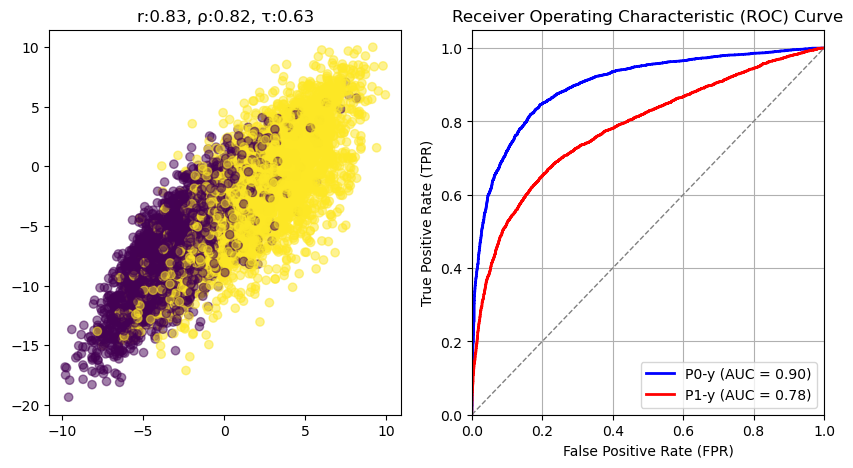

In [62]:
dataset = 'mnist'
method = 'uPU vs nnPU'
n_p = 100

pred_nnPU = pd.read_csv(f"output/{dataset}/p={n_p}/nnPU_valid.csv").values
pred_uPU = pd.read_csv(f"output/{dataset}/p={n_p}/uPU_valid.csv").values
truth = pd.read_csv(f"output/{dataset}/p={n_p}/truth.csv").values

scores = plotROC(pred_nnPU, pred_uPU, truth=truth, show=True)

_cor = scores['cor']
_rho = scores['rho']
_tau = scores['tau']
_auc = scores['truth_auc']

In [63]:
print(f'dataset {dataset} method {method} @p_num={n_p} scores - cor:{_cor:.3f}, rho:{_rho:.3f}, tau:{_tau:.3f}, target_auc:{_auc:.3f}')

dataset mnist method uPU vs nnPU @p_num=100 scores - cor:0.825, rho:0.819, tau:0.632, target_auc:0.841


In [64]:
print(f'{n_p}|{_cor:.3f}|{_rho:.3f}|{_tau:.3f}|{_auc:.3f}')

100|0.825|0.819|0.632|0.841


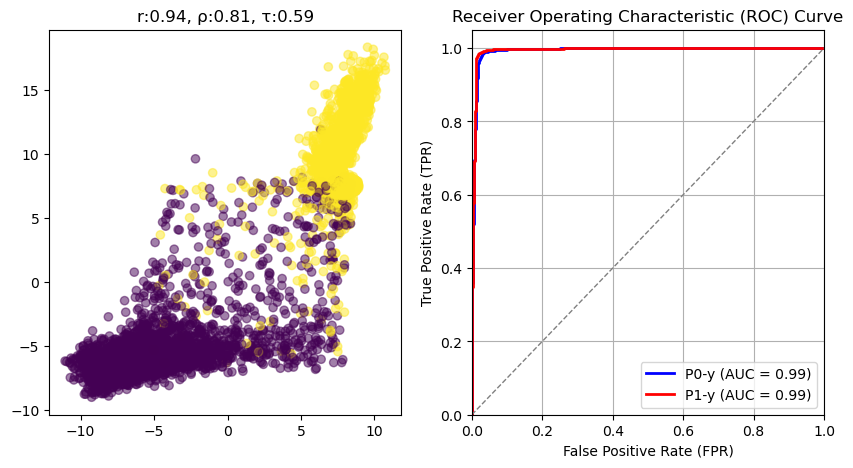

In [58]:
dataset = 'mnist'
method = 'uPU vs nnPU'
n_p = 25000

pred_nnPU = pd.read_csv(f"output/{dataset}/p={n_p}/nnPU_valid.csv").values
pred_uPU = pd.read_csv(f"output/{dataset}/p={n_p}/uPU_valid.csv").values
truth = pd.read_csv(f"output/{dataset}/p={n_p}/truth.csv").values

scores = plotROC(pred_nnPU, pred_uPU, truth=truth, show=True)

_cor = scores['cor']
_rho = scores['rho']
_tau = scores['tau']
_auc = scores['truth_auc']

In [60]:
print(f'dataset {dataset} method {method} scores - cor:{_cor:.3f}, rho:{_rho:.3f}, tau:{_tau:.3f}, target_auc:{_auc:.3f}')

dataset mnist method uPU vs nnPU scores - cor:0.943, rho:0.811, tau:0.588, target_auc:0.994


In [61]:
print(f'{n_p}|{_cor:.3f}|{_rho:.3f}|{_tau:.3f}|{_auc:.3f}')

25000|0.943|0.811|0.588|0.994
